# Pre-Processing and Training Data Development
Creating dummy features
Scale standardization
Split data into training and testing subsets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm

C:\Users\ptlon\AppData\Local\Temp/ipykernel_18720/2988767508.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing the dataset
df = pd.read_excel("C:\\Users\\ptlon\\OneDrive\\Desktop\\output - Copy.xlsx")
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2
3,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2
4,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2
...,...,...,...,...,...,...,...,...,...
285,1000000,HandyTrain,Technology,Mobile Learning Management Platform,Goa,NB Ventures,Private Equity,7045,1
286,1000000,HandyTrain,Consumer Internet,Mobile App for SAAS based Training,Goa,Silver Range Investments Lumina Datamatics Shu...,Private Equity,7045,1
287,1350000,MobieFit,Healthcare,Health and fitness based mobile App,Goa,NB Ventures MediAssist,Seed/Angel Funding,7045,1
288,15500000,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,3433,5


In [3]:
df.head()

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2
3,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2
4,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2


In [4]:
df.set_index('Startup Name')

,Amount (In USD),Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
Startup Name,,,,,,,,
Cloudrino,22500,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2
Newspatrolling,25000,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2
Book Servicing,30000,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2
goSporto,30000,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2
Perfumery,30000,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2
...,...,...,...,...,...,...,...,...
HandyTrain,1000000,Technology,Mobile Learning Management Platform,Goa,NB Ventures,Private Equity,7045,1
HandyTrain,1000000,Consumer Internet,Mobile App for SAAS based Training,Goa,Silver Range Investments Lumina Datamatics Shu...,Private Equity,7045,1
MobieFit,1350000,Healthcare,Health and fitness based mobile App,Goa,NB Ventures MediAssist,Seed/Angel Funding,7045,1


In [5]:
sns.set_style(style = 'whitegrid')


In [6]:
df.describe()

,Amount (In USD),2017,Rank
count,2.900000e+02,290.000000,290.000000
mean,1.173599e+07,5536.393103,2.065517
std,5.485491e+07,339.260090,0.587515
min,2.250000e+04,3097.000000,1.000000
25%,2.500000e+05,5533.000000,2.000000
50%,1.000000e+06,5533.000000,2.000000
75%,4.850000e+06,5533.000000,2.000000
max,6.800000e+08,7045.000000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Amount (In USD)  290 non-null    int64 
 1   Startup Name     290 non-null    object
 2   Industry         290 non-null    object
 3   Sub-Vertical     290 non-null    object
 4   State            290 non-null    object
 5   Investors’ Name  286 non-null    object
 6   Investment Type  290 non-null    object
 7   2017             290 non-null    int64 
 8   Rank             290 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 20.5+ KB


Split the dataset into Independent(X) and Dependent(y) Variables

In [8]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [9]:
x

array([[    22500],
       [    25000],
       [    30000],
       [    30000],
       [    30000],
       [    37000],
       [    40000],
       [    45000],
       [    46140],
       [    50000],
       [    50000],
       [    70000],
       [    77000],
       [    80000],
       [    89000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   100000],
       [   104000],
       [   110000],
       [   120000],
       [   120000],
       [   123000],
       [   133000],
       [   141000],
       [   145000],
       [   145000],
       [   147000],
       [   148000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   150000],
       [   155000],
       [   156000],


In [10]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 5, 7], dtype=int64)

Divide the complete dataset into training and testing data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Implement Classifier based on Simple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)
predictions

array([2.03893886, 2.03893248, 2.03891545, 2.03888535, 2.03887978,
       2.03893942, 2.03894079, 2.03888535, 2.03893998, 2.03893998,
       2.03893273, 2.03893385, 2.03894024, 2.0386401 , 2.03893842,
       2.03892995, 2.03882962, 2.03892995, 2.03891434, 2.03892995,
       2.03892437, 2.03877388, 2.03893735, 2.03885526, 2.03870699,
       2.03827223, 2.03893608, 2.03882962, 2.03888535, 2.03884076,
       2.03893418, 2.03894058, 2.03894068, 2.03887421, 2.03885191,
       2.0386624 , 2.03892103, 2.03843944, 2.03894059, 2.03893835,
       2.03893781, 2.03892437, 2.03892995, 2.03888535, 2.03882962,
       2.03892995, 2.0389266 , 2.03893886, 2.03893775, 2.03887867,
       2.03893886, 2.03893831, 2.03893998, 2.03893474, 2.03893441,
       2.03877388, 2.03893552, 2.03893998])

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

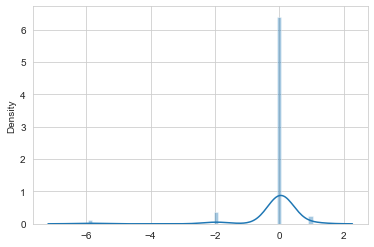

In [14]:
sns.distplot(predictions-y_test)

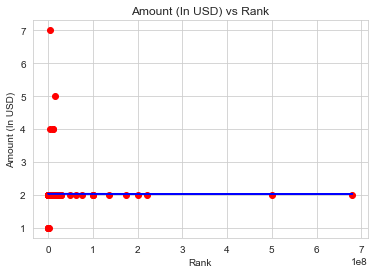

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Amount (In USD) vs Rank')
plt.xlabel('Rank')
plt.ylabel('Amount (In USD)')
plt.show()

Standardize the magnitude of numeric features using a scaler


In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [17]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [18]:
predictionss = models.predict(Xs)
predictionss

array([ 1.03009341e-02,  9.20450915e-03,  6.27911340e-03,  1.10820113e-03,
        1.50624778e-04,  1.03966917e-02,  1.06322555e-02,  1.10820113e-03,
        1.04924493e-02,  1.04924493e-02,  9.24760008e-03,  9.43911535e-03,
        1.05364978e-02, -4.10251582e-02,  1.02243280e-02,  8.76881191e-03,
       -8.46756235e-03,  8.76881191e-03,  6.08759814e-03,  8.76881191e-03,
        7.81123556e-03, -1.80433258e-02,  1.00404733e-02, -4.06271115e-03,
       -2.95342420e-02, -1.04225197e-01,  9.82214589e-03, -8.46756235e-03,
        1.10820113e-03, -6.55240966e-03,  9.49656993e-03,  1.05955995e-02,
        1.06131040e-02, -8.06951570e-04, -4.63725696e-03, -3.71948528e-02,
        7.23668975e-03, -7.54979067e-02,  1.05977827e-02,  1.02128370e-02,
        1.01189946e-02,  7.81123556e-03,  8.76881191e-03,  1.10820113e-03,
       -8.46756235e-03,  8.76881191e-03,  8.19426610e-03,  1.03009341e-02,
        1.01094188e-02, -4.08904912e-05,  1.03009341e-02,  1.02051764e-02,
        1.04924493e-02,  

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

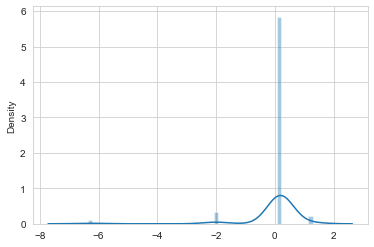

In [19]:
sns.distplot(predictionss-Ys)

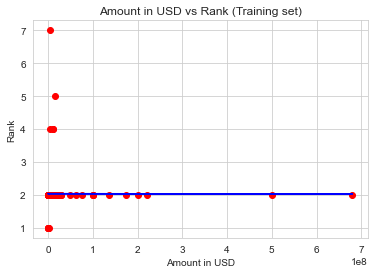

In [20]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Amount in USD vs Rank (Training set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

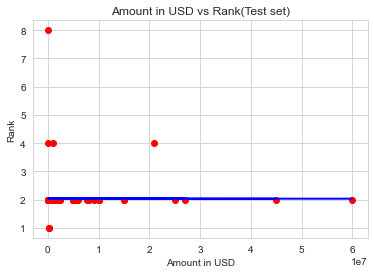

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Amount in USD vs Rank(Test set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

Standardize the magnitude of numeric features using a scaler

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [23]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [24]:
predictionss = models.predict(Xs)
predictionss

array([ 1.03009341e-02,  9.20450915e-03,  6.27911340e-03,  1.10820113e-03,
        1.50624778e-04,  1.03966917e-02,  1.06322555e-02,  1.10820113e-03,
        1.04924493e-02,  1.04924493e-02,  9.24760008e-03,  9.43911535e-03,
        1.05364978e-02, -4.10251582e-02,  1.02243280e-02,  8.76881191e-03,
       -8.46756235e-03,  8.76881191e-03,  6.08759814e-03,  8.76881191e-03,
        7.81123556e-03, -1.80433258e-02,  1.00404733e-02, -4.06271115e-03,
       -2.95342420e-02, -1.04225197e-01,  9.82214589e-03, -8.46756235e-03,
        1.10820113e-03, -6.55240966e-03,  9.49656993e-03,  1.05955995e-02,
        1.06131040e-02, -8.06951570e-04, -4.63725696e-03, -3.71948528e-02,
        7.23668975e-03, -7.54979067e-02,  1.05977827e-02,  1.02128370e-02,
        1.01189946e-02,  7.81123556e-03,  8.76881191e-03,  1.10820113e-03,
       -8.46756235e-03,  8.76881191e-03,  8.19426610e-03,  1.03009341e-02,
        1.01094188e-02, -4.08904912e-05,  1.03009341e-02,  1.02051764e-02,
        1.04924493e-02,  

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

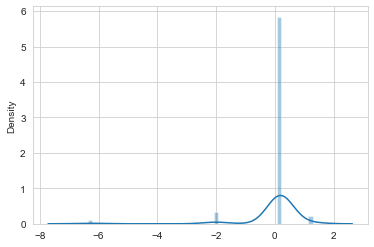

In [25]:
sns.distplot(predictionss-Ys)

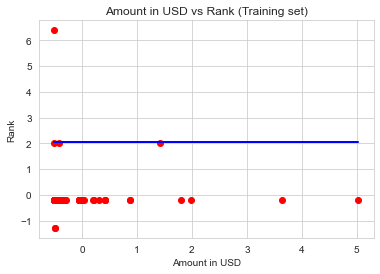

In [26]:
plt.scatter(Xs, Ys, color = 'red')
plt.plot(Xs, model.predict(Xs), color = 'blue')
plt.title('Amount in USD vs Rank (Training set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

Convert categorical data into dummy or indicator variables

In [27]:
state_dummies = pd.get_dummies(df, prefix='State', drop_first=True) 
df = pd.concat([df, state_dummies], axis = 1)
df.head()

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank,Amount (In USD),...,State_Private Equity,State_Seed,State_Seed / Angel Funding,State_Seed Funding,State_Seed Round,State_Seed/ Angel Funding,State_Seed/Angel Funding,State_Series A,State_Series B,State_Series D
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2,22500,...,0,0,0,1,0,0,0,0,0,0
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2,25000,...,0,0,0,1,0,0,0,0,0,0
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2,30000,...,0,0,0,1,0,0,0,0,0,0
3,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2,30000,...,0,0,0,1,0,0,0,0,0,0
4,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2,30000,...,0,0,0,1,0,0,0,0,0,0


In [28]:
Industry_dummies = pd.get_dummies(df, prefix='Industry') 
df = pd.concat([df, Industry_dummies], axis = 1)
df.head()

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank,Amount (In USD),...,Industry_Private Equity,Industry_Seed,Industry_Seed / Angel Funding,Industry_Seed Funding,Industry_Seed Round,Industry_Seed/ Angel Funding,Industry_Seed/Angel Funding,Industry_Series A,Industry_Series B,Industry_Series D
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2,22500,...,0,0,0,1,0,0,0,0,0,0
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2,25000,...,0,0,0,1,0,0,0,0,0,0
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2,30000,...,0,0,0,1,0,0,0,0,0,0
3,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2,30000,...,0,0,0,1,0,0,0,0,0,0
4,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2,30000,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df.to_csv("Amount (In USD)_dummies.csv")

In [30]:
data = df[["Amount (In USD)", "Startup Name", "Industry", "Sub-Vertical", "State", "Investors’ Name", "Investment Type", "Rank"]]

In [31]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [32]:
print(X.shape, y.shape)

(290, 13) (290,)


In [33]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(194, 13) (96, 13) (194,) (96,)


HOT Fix for Regressor analysis

In [34]:
df.index = range(290)

In [35]:
df = df.drop('Startup Name', axis =1)

In [36]:
df = df.drop('Sub-Vertical', axis=1)

In [37]:
df = df.drop('Industry', axis=1)

In [38]:
df = df.drop('State', axis=1)

In [39]:
df = df.drop('Investors’ Name', axis=1)

In [40]:
df = df.drop('Investment Type', axis=1)

In [46]:
df.dropna


<bound method DataFrame.dropna of      Amount (In USD)  2017  Rank  Amount (In USD)  2017  Rank  State_3Dexter  \
0              22500  5533     2            22500  5533     2              0   
1              25000  5533     2            25000  5533     2              0   
2              30000  5533     2            30000  5533     2              0   
3              30000  5533     2            30000  5533     2              0   
4              30000  5533     2            30000  5533     2              0   
..               ...   ...   ...              ...   ...   ...            ...   
285          1000000  7045     1          1000000  7045     1              0   
286          1000000  7045     1          1000000  7045     1              0   
287          1350000  7045     1          1350000  7045     1              0   
288         15500000  3433     5         15500000  3433     5              0   
289          3584000  3139     7          3584000  3139     7              0   

     

In [47]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(194, 13) (96, 13) (194,) (96,)


In [49]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Kriger Campus'

In [50]:
sns.distplot(yhat-y_test)# make predictions


NameError: name 'yhat' is not defined

In [51]:
sns.distplot(yhat-y_test)

NameError: name 'yhat' is not defined